#**Strategic Insights: Superstore Marketing Channels and Customer Segmentation**

**Hijir Della Wirasti**

## Case Study Strategic Marketing Insights: Uncovering Growth with Marketing Channel Analysis and Customer Segmentation

### Introduction

This notebook presents a comprehensive analysis of customer data from the Superstore dataset to derive actionable insights using **RFM Segmentation** and **Data Visualization**. Through exploratory data analysis (EDA), trends and patterns in customer behavior are uncovered to create a focused and data-driven storytelling approach. The analysis aims to provide meaningful business recommendations to enhance decision-making processes.

---

### **Objective**
The primary objectives of this analysis are:
1. Perform **Exploratory Data Analysis (EDA)** to identify key patterns and visualize customer behavior.
2. Apply **RFM Analysis** (Recency, Frequency, and Monetary) to segment customers and identify valuable customer groups.
3. Derive actionable insights and recommendations to solve the main business problem.
4. Develop an optional interactive dashboard using **Tableau Public** to showcase data insights effectively.

---

### **Dataset Information**
- **Dataset Link:** [Superstore Dataset](https://docs.google.com/spreadsheets/d/1TYOF99lS_0F5SVQc9c9xXGMTj8FsL5vOAP7-9u3WTO0/edit?gid=2078740087#gid=2078740087)
- The dataset contains retail transactional data, including:
  - **Customer Information**: Customer ID, name, and segment.
  - **Sales Transactions**: Order date, product category, sales, discount, and profit.
  - **Geographic Data**: City, state, region, and country.

---

### **Deliverables**
1. **Exploratory Data Analysis (EDA)**:
   - Visualize key metrics such as sales, profit, and customer segments.
   - Identify trends and patterns in the dataset to define the main problem.
   
2. **RFM Analysis**:
   - Calculate **Recency**, **Frequency**, and **Monetary** values for customer segmentation.
   - Visualize RFM segmentation and explain the findings in detail.

3. **Insights and Recommendations**:
   - Provide insights based on the EDA and RFM Analysis results.
   - Propose actionable strategies to address the identified business problem.

4. **Presentation**:
   - Prepare a Google Slides presentation summarizing the findings and recommendations.
   - Optionally include a **Tableau Public Dashboard** to enhance the storytelling and visual representation of the data.

---

### **Key Focus**
- This analysis is presented in **English** to ensure it is globally accessible and to establish a professional portfolio for future opportunities.
- It emphasizes **clarity**, **data-driven insights**, and **visual storytelling**.

This notebook demonstrates expertise in data analysis, visualization, and storytelling, making it a strong addition to a professional data portfolio.

In [4]:
# Import Libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Load File

In [5]:
# Read Excel file
df = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vTiZTXjvnBAXxnngNe-zYUXX9THJj-RZmppqg2umWxUkGOWdwI4DCopJKRtiAt0pQ/pub?output=xlsx')
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  subcategory    9994 n

In [7]:
df.describe()

,row_id,order_date,ship_date,postal_code,sales,quantity,discount,profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355392,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [8]:
# see the number of missing values from the data frame
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,row_id,0
1,order_id,0
2,order_date,0
3,ship_date,0
4,ship_mode,0
5,customer_id,0
6,customer_name,0
7,segment,0
8,country,0
9,city,0


In [9]:
df.duplicated().sum()

0

There is no missing value and duplicate data

# EDA (Exploratory data analysis)

## Univariate Analysis

In [10]:
# Fungsi untuk menambahkan label pada grafik batang
def add_bar_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}',
                    (p.get_x() + p.get_width() / 2, p.get_height() + 0.05),
                    ha='center', va='bottom', fontsize=10)



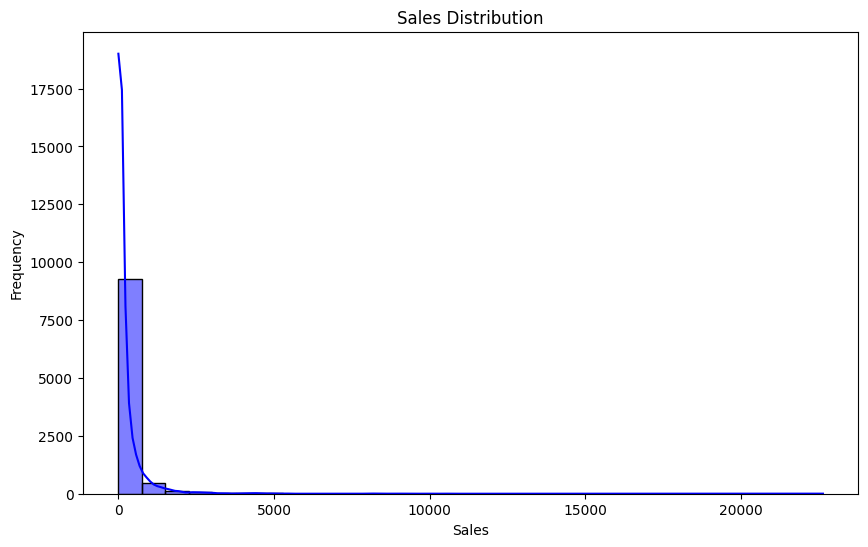

In [11]:
# Univariate Analysis: Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sales'], kde=True, bins=30, color='blue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

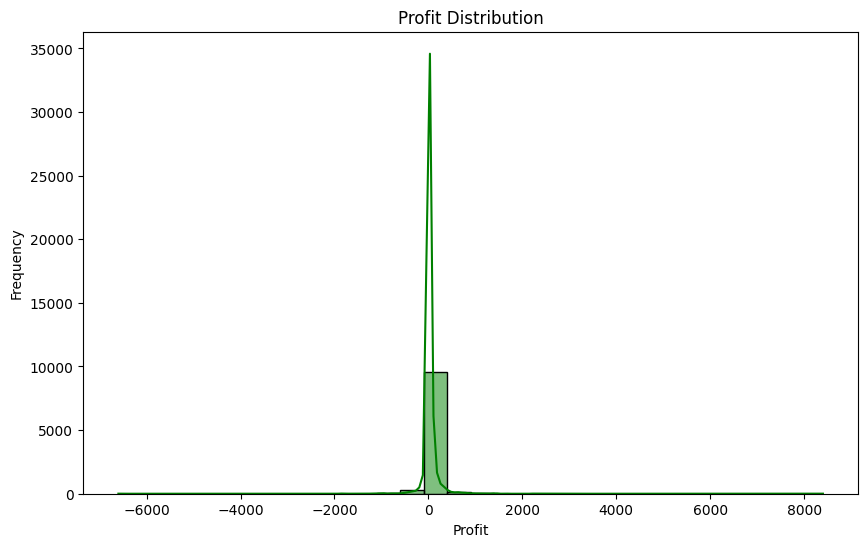

In [12]:
# Univariate Analysis: Profit Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['profit'], kde=True, bins=30, color='green')
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


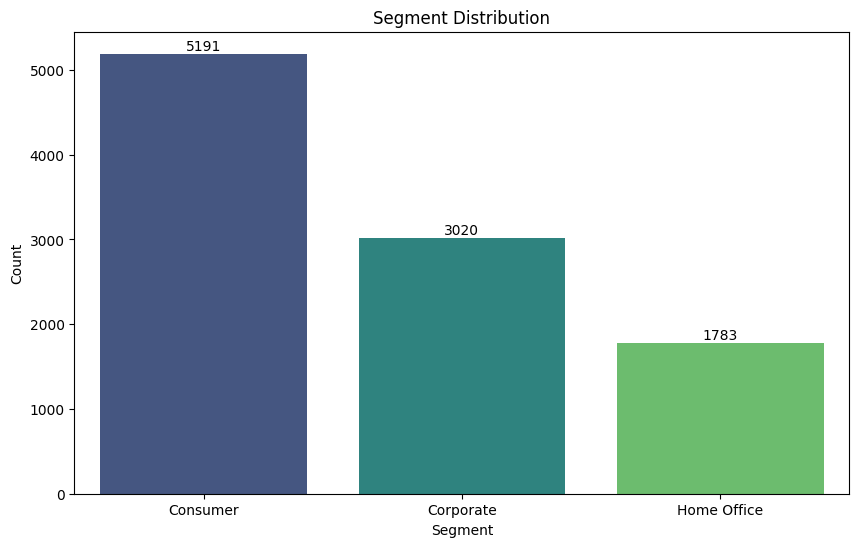

In [13]:
# Univariate Analysis: Segment Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='segment', palette='viridis')
plt.title('Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
add_bar_labels(ax)
plt.show()

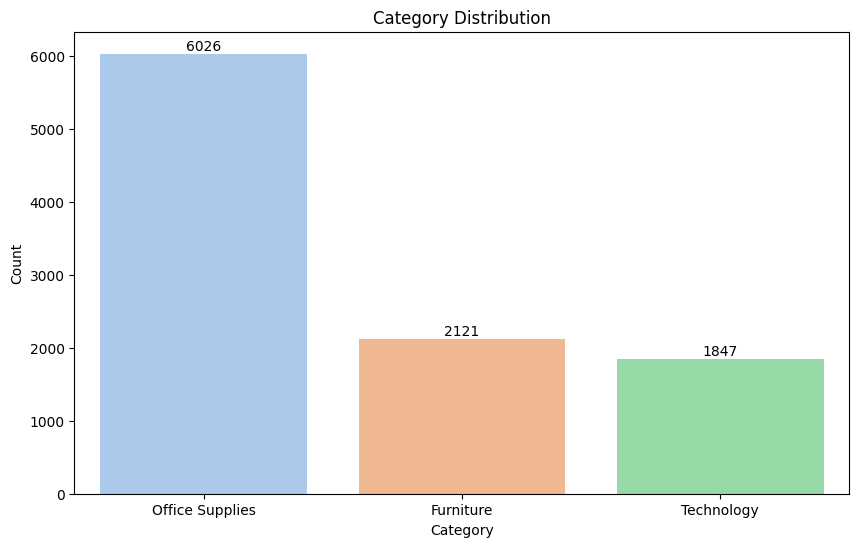

In [14]:
# Univariate Analysis: Category Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='category', palette='pastel', order=df['category'].value_counts().index)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
add_bar_labels(ax)
plt.show()


## Multivariate Analysis

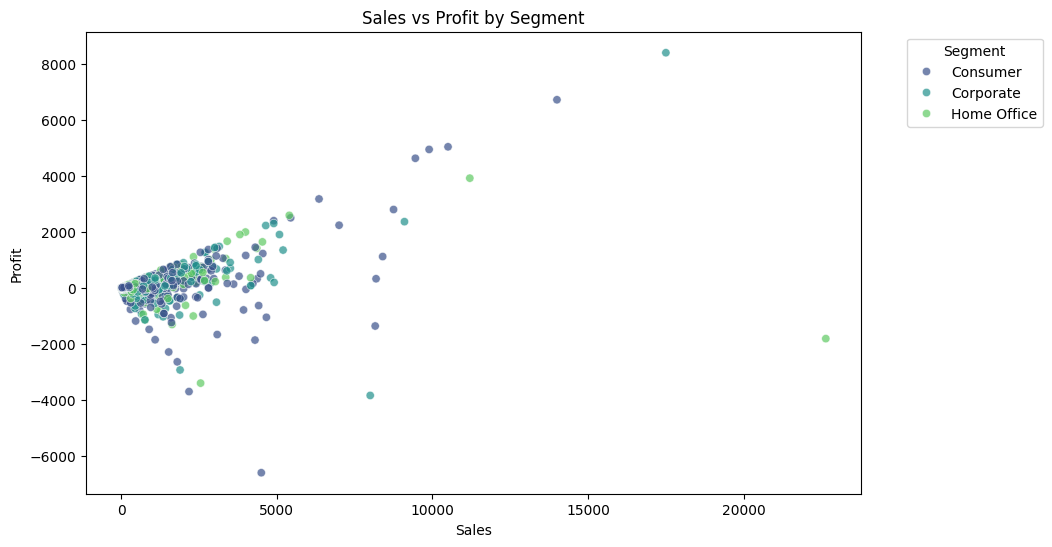

In [15]:
# Multivariate Analysis: Sales vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sales', y='profit', hue='segment', palette='viridis', alpha=0.7)
plt.title('Sales vs Profit by Segment')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


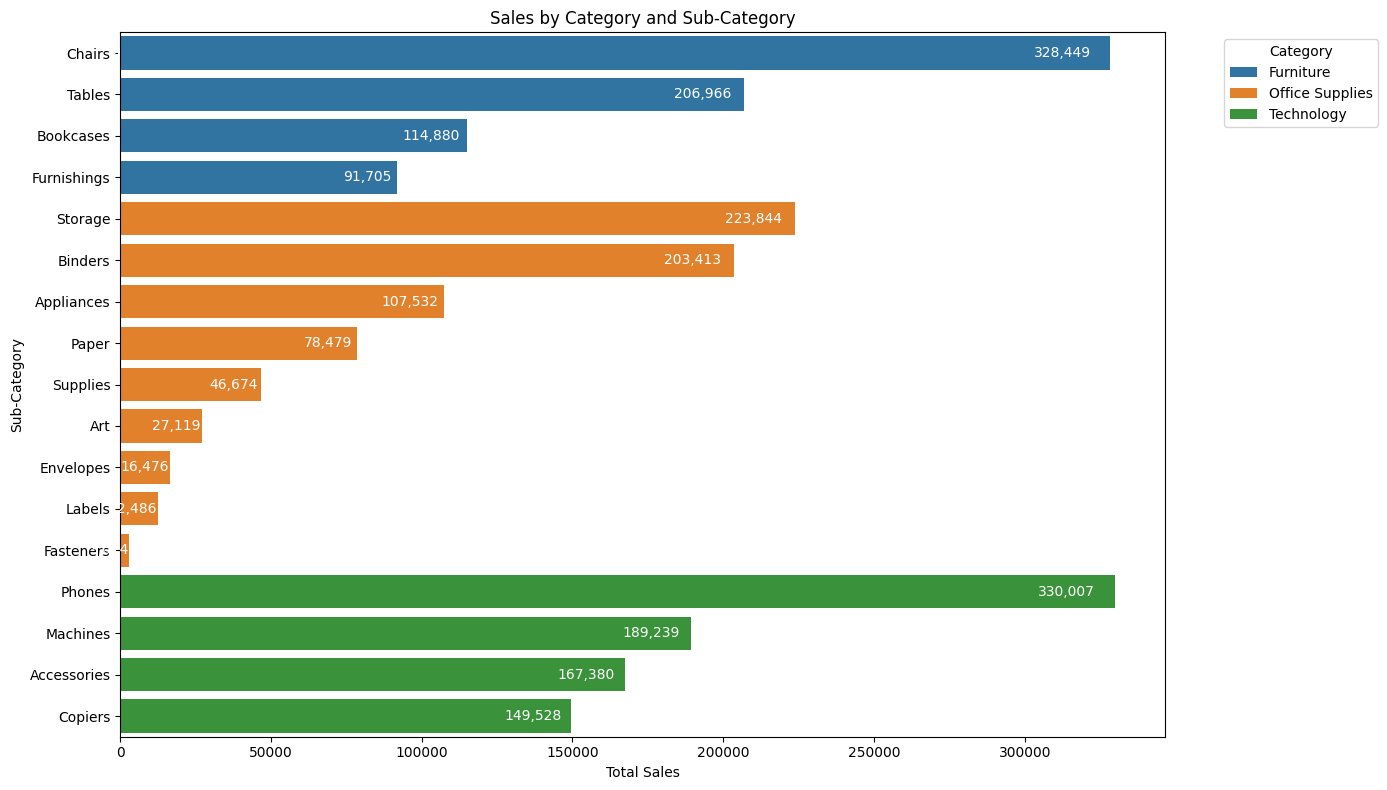

In [16]:
# Multivariate Analysis: Sales by Category and Sub-Category

plt.figure(figsize=(14, 8))
category_sales = df.groupby(['category', 'subcategory'])['sales'].sum().reset_index()
category_sales = category_sales.sort_values(by=['category', 'sales'], ascending=[True, False])

ax = sns.barplot(data=category_sales, x='sales', y='subcategory', hue='category', dodge=False)

plt.title('Sales by Category and Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')

# Tambahkan label dengan pemisah ribuan
for i, p in enumerate(ax.patches):
    sales_value = p.get_width()
    ax.text(sales_value - sales_value * 0.02,  # Letakkan sedikit ke kiri dari ujung batang
            p.get_y() + p.get_height() / 2,
            f'{sales_value:,.0f}',  # Format dengan pemisah ribuan
            va='center', ha='right', fontsize=10, color='white')

# Perbesar frame sebelah kanan dengan margin lebih kecil (5%)
plt.xlim(0, category_sales['sales'].max() * 1.05)  # Tambahkan margin 5% di sisi kanan
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

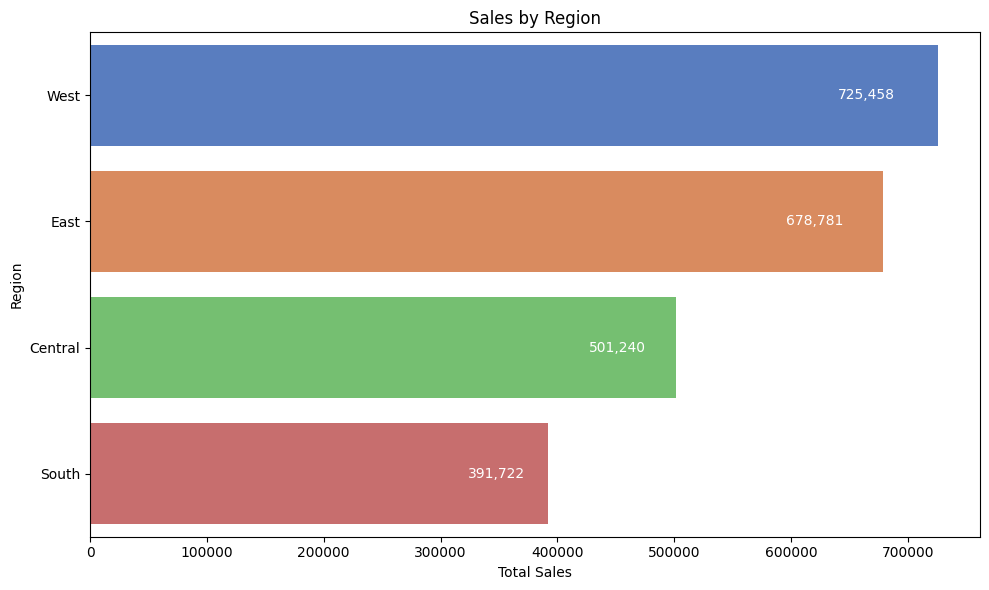

In [17]:
# Multivariate Analysis: Sales by Region
plt.figure(figsize=(10, 6))
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)
ax = sns.barplot(x=region_sales.values, y=region_sales.index, palette='muted')

plt.title('Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')

# Tambahkan label di dalam batang pada ujung dengan pemisah ribuan
for i, v in enumerate(region_sales.values):
    ax.text(v - (v * 0.05), i, f'{v:,.0f}',  # Format angka dengan pemisah ribuan
            va='center', ha='right', fontsize=10, color='white')  # Label di dalam batang

plt.tight_layout()
plt.show()

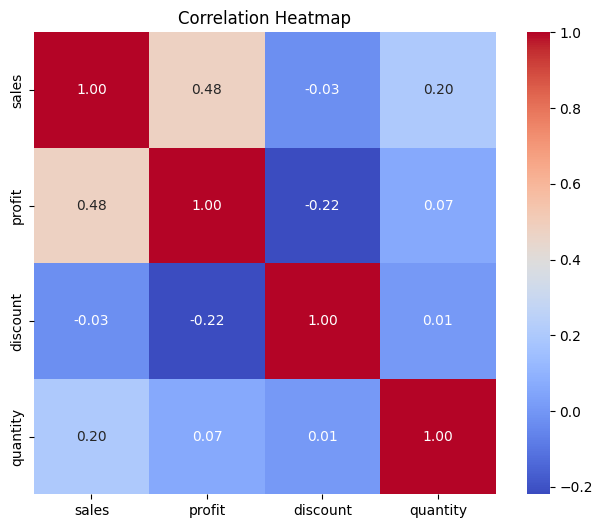

In [18]:
# Multivariate Analysis: Correlation Heatmap
plt.figure(figsize=(8, 6))
numerical_features = ['sales', 'profit', 'discount', 'quantity']
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

# RFM Analysis

In [19]:
# Pastikan kolom tanggal dalam format datetime
df['order_date'] = pd.to_datetime(df['order_date'])

In [20]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  subcategory    9994 n

In [22]:
# Hitung RFM
rfm = df.groupby('customer_id').agg(
    Recency=('order_date', lambda x: (pd.Timestamp.today() - x.max()).days),
    Frequency=('order_id', 'nunique'),
    Monetary=('sales', 'sum')  # Total transaksi
).reset_index()


In [23]:
# Hitung AOV (Average Order Value)
rfm['AOV'] = rfm['Monetary'] / rfm['Frequency']

In [24]:
rfm.head()

,customer_id,Recency,Frequency,Monetary,AOV
0,AA-10315,2767,5,5563.560,1112.712000
1,AA-10375,2602,9,1056.390,117.376667
2,AA-10480,2842,4,1790.512,447.628000
3,AA-10645,2638,6,5086.935,847.822500
4,AB-10015,2998,3,886.156,295.385333


## RFM Quartiles

In [25]:
# RFM Quartile, M >> AOV

rfm['Recency_Quartile'] = pd.qcut(rfm['Recency'], 4, labels=[1, 2, 3, 4])  # Semakin rendah Recency semakin baik
rfm['Frequency_Quartile'] = pd.qcut(rfm['Frequency'], 4, labels=[4, 3, 2, 1])  # Semakin tinggi Frequency semakin baik
rfm['AOV_Quartile'] = pd.qcut(rfm['AOV'], 4, labels=[4, 3, 2, 1])  # Semakin tinggi AOV semakin baik


In [26]:
rfm.head(10)

,customer_id,Recency,Frequency,Monetary,AOV,Recency_Quartile,Frequency_Quartile,AOV_Quartile
0,AA-10315,2767,5,5563.560,1112.712000,4,4,1
1,AA-10375,2602,9,1056.390,117.376667,1,1,4
2,AA-10480,2842,4,1790.512,447.628000,4,4,2
3,AA-10645,2638,6,5086.935,847.822500,2,3,1
4,AB-10015,2998,3,886.156,295.385333,4,4,3
5,AB-10060,2637,8,7755.620,969.452500,2,2,1
6,AB-10105,2624,10,14473.571,1447.357100,2,1,1
7,AB-10150,2624,5,966.710,193.342000,2,4,4
8,AB-10165,2608,8,1113.838,139.229750,1,2,4
9,AB-10255,2749,9,914.532,101.614667,3,1,4


# Customer Segmentation

In [27]:
def segment_customer(row):
    r, f, m = row['Recency_Quartile'], row['Frequency_Quartile'], row['AOV_Quartile']

    # 1. Best Customer
    if r == 1 and f == 1 and m == 1:
        return 'Best Customer'
    # 2. Potential Customers
    elif (r == 1 and f == 1 and m == 2) or \
         (r == 1 and f == 2 and m == 2) or \
         (r == 2 and f == 1 and m == 1) or \
         (r == 2 and f == 2 and m == 2):
        return 'Potential Customers'
    # 3. Lost Cheap
    elif r == 4 and f == 4 and m in [4, 3]:
        return 'Lost Cheap'
    # 4. Big Spender
    elif m == 1:
        return 'Big Spender'
    # 5. Loyal Customers
    elif f == 1:
        return 'Loyal Customers'
    # 6. Others/Recent Shopper
    elif (r == 1 or r == 2):
        return 'Others/Recent Shopper'
    # 7. Almost Lost
    elif r == 3:
        return 'Almost Lost'
    # 8. Lost Customers
    elif r == 4:
        return 'Lost Customers'

    # Default: Segmen tidak dikenal
    else:
        return 'Others'

# Tambahkan kolom segmentasi ke DataFrame
rfm['Segment'] = rfm.apply(segment_customer, axis=1)


In [28]:
# Tambahkan kolom RFM Score sebagai kombinasi tiga angka
rfm['RFM_Score'] = (
    rfm['Recency_Quartile'].astype(str) +
    rfm['Frequency_Quartile'].astype(str) +
    rfm['AOV_Quartile'].astype(str)
)

In [29]:
rfm.head(10)

,customer_id,Recency,Frequency,Monetary,AOV,Recency_Quartile,Frequency_Quartile,AOV_Quartile,Segment,RFM_Score
0,AA-10315,2767,5,5563.560,1112.712000,4,4,1,Big Spender,441
1,AA-10375,2602,9,1056.390,117.376667,1,1,4,Loyal Customers,114
2,AA-10480,2842,4,1790.512,447.628000,4,4,2,Lost Customers,442
3,AA-10645,2638,6,5086.935,847.822500,2,3,1,Big Spender,231
4,AB-10015,2998,3,886.156,295.385333,4,4,3,Lost Cheap,443
5,AB-10060,2637,8,7755.620,969.452500,2,2,1,Big Spender,221
6,AB-10105,2624,10,14473.571,1447.357100,2,1,1,Potential Customers,211
7,AB-10150,2624,5,966.710,193.342000,2,4,4,Others/Recent Shopper,244
8,AB-10165,2608,8,1113.838,139.229750,1,2,4,Others/Recent Shopper,124
9,AB-10255,2749,9,914.532,101.614667,3,1,4,Loyal Customers,314


In [30]:
# Save RFM to csv
rfm.to_csv('Superstore_RFM_Analysis.csv', index=False)

In [31]:
#Save RFM to Excel
rfm.to_excel('Superstore_RFM_Analysis.xlsx', index=False)

# Visualization of Segmentation

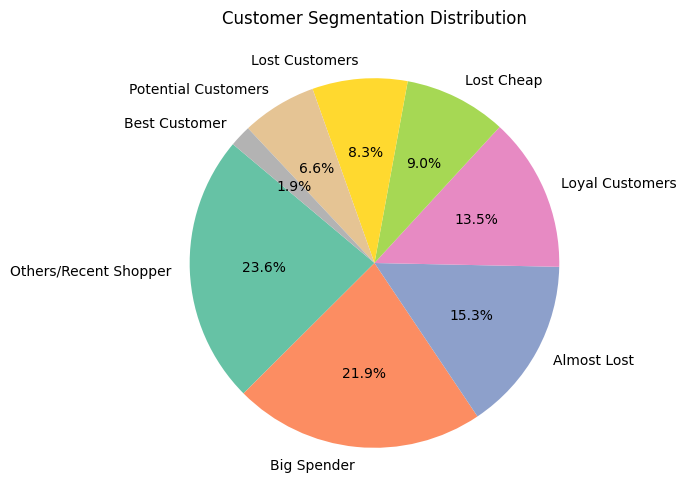

In [ ]:
# 1. Pie Chart - Customer Segment Distribution
plt.figure(figsize=(10, 6))
segment_counts = rfm['Segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Customer Segmentation Distribution')
plt.show()

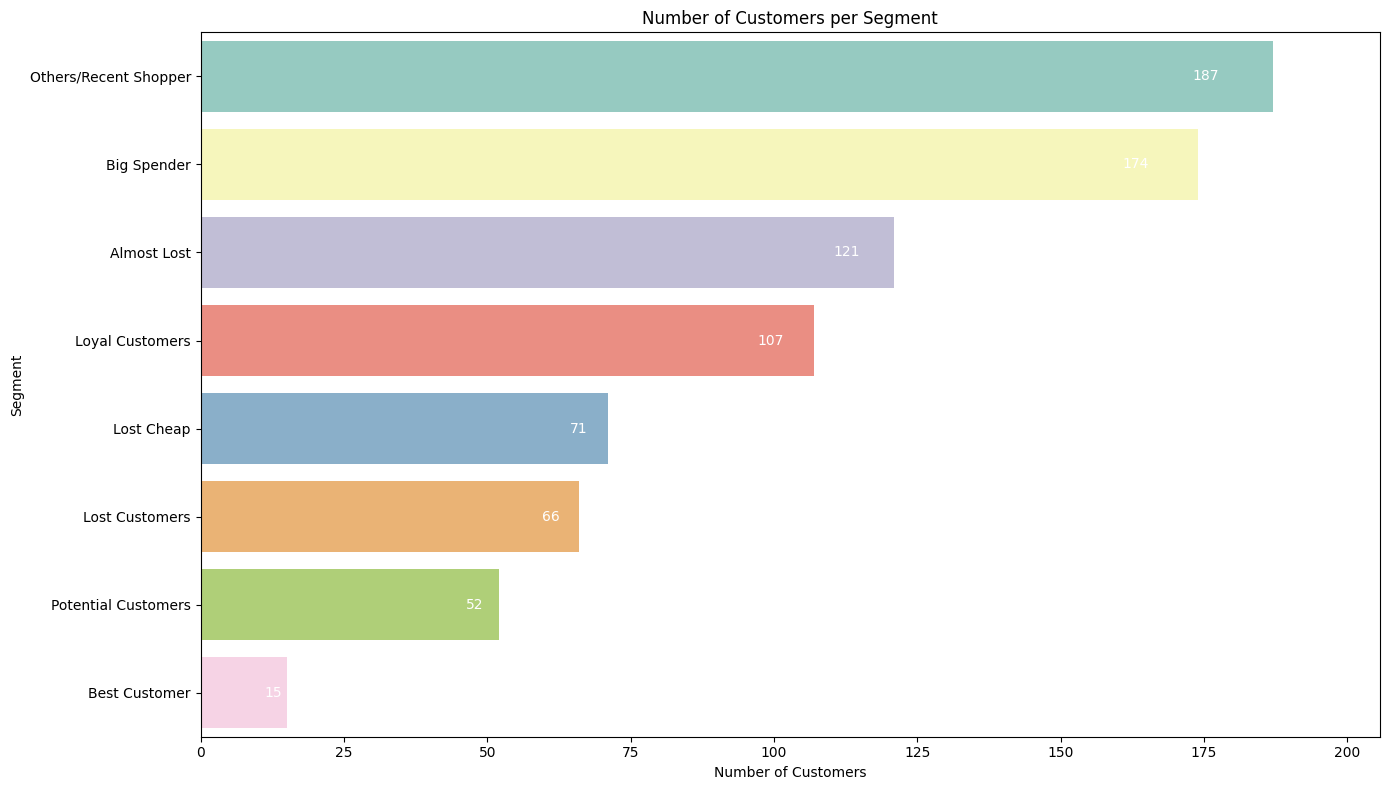

In [ ]:
# 2. Bar Chart - Number of Customers per Segment
plt.figure(figsize=(14, 8))
segment_counts = rfm['Segment'].value_counts()

# Plot bar chart
ax = sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='Set3')

plt.title('Number of Customers per Segment')
plt.xlabel('Number of Customers')
plt.ylabel('Segment')

# Add labels inside bars
for i, v in enumerate(segment_counts.values):
    ax.text(v - v * 0.05, i, f'{v}',  # Position slightly left inside the bar
            va='center', ha='right', fontsize=10, color='white')  # White label for contrast

plt.xlim(0, segment_counts.max() * 1.1)  # Slightly increase frame to add space
plt.tight_layout()
plt.show()

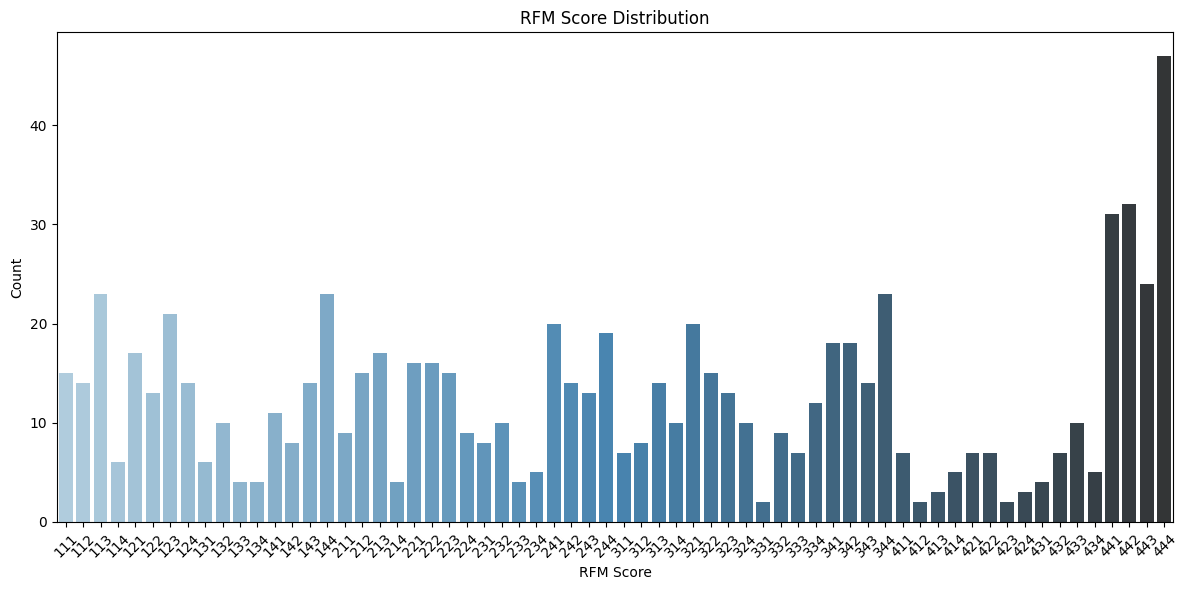

In [ ]:
# 3. Bar Chart - RFM Score Distribution
plt.figure(figsize=(12, 6))
rfm_score_counts = rfm['RFM_Score'].value_counts().reset_index()
rfm_score_counts.columns = ['RFM_Score', 'Count']
rfm_score_counts = rfm_score_counts.sort_values(by='RFM_Score')  # Sort by RFM Score for clarity

sns.barplot(data=rfm_score_counts, x='RFM_Score', y='Count', palette='Blues_d')
plt.title('RFM Score Distribution')
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

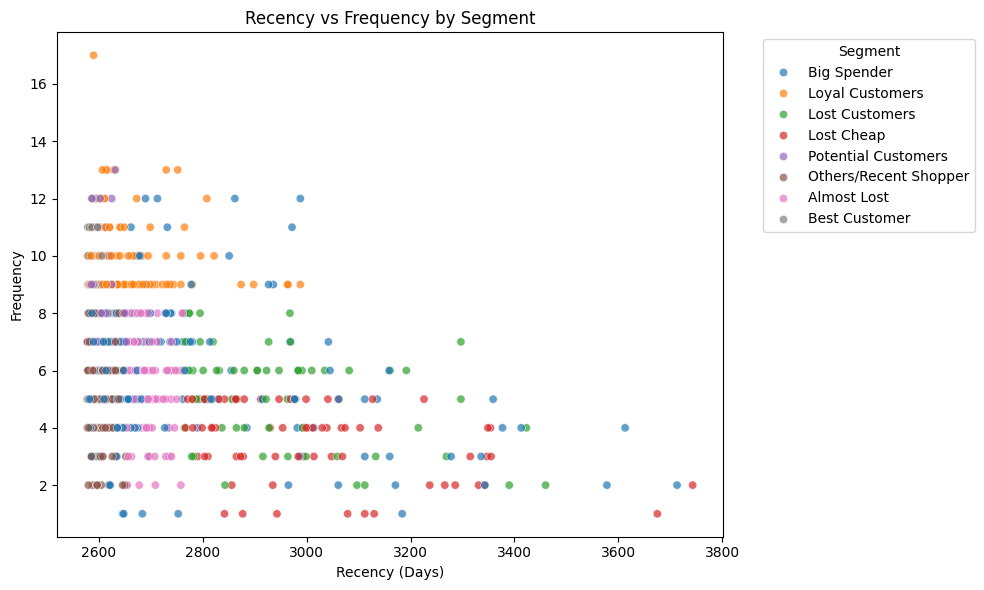

In [ ]:
# 4. Scatter Plot - Recency vs Frequency by Segment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', palette='tab10', alpha=0.7)
plt.title('Recency vs Frequency by Segment')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Ensure AOV_Quartile is numeric
rfm['AOV_Quartile'] = pd.to_numeric(rfm['AOV_Quartile'], errors='coerce')

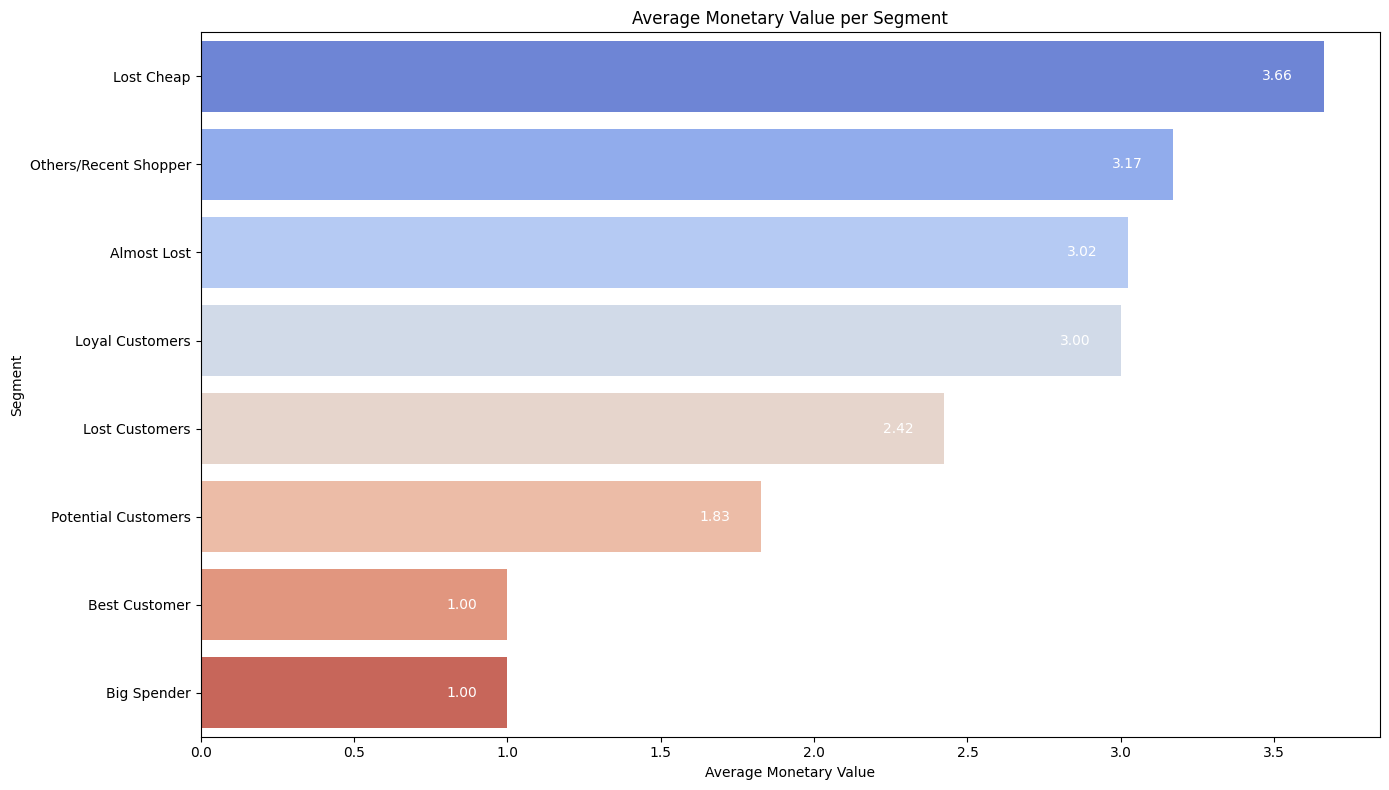

In [ ]:
# 5. Bar Chart - Average Monetary Value per Segment
plt.figure(figsize=(14, 8))
monetary_segment = rfm.groupby('Segment')['AOV_Quartile'].mean().sort_values(ascending=False)

# Plot bar chart
ax = sns.barplot(x=monetary_segment.values, y=monetary_segment.index, palette='coolwarm')

plt.title('Average Monetary Value per Segment')
plt.xlabel('Average Monetary Value')
plt.ylabel('Segment')

# Add labels inside the bars
for i, v in enumerate(monetary_segment.values):
    ax.text(v - 0.1, i, f'{v:.2f}',  # Position slightly left inside the bar
            va='center', ha='right', fontsize=10, color='white')  # White label for contrast

plt.tight_layout()
plt.show()




# Prepare file for Tableau Visualization

In [32]:
# Merge RFM table with original DataFrame
df_merged = df.merge(rfm, on='customer_id', how='left')

# Save the merged DataFrame to an Excel file
output_file = "RFM_Analysis_with_Segmentation.xlsx"
df_merged.to_excel(output_file, index=False)

print(f"File has been saved to: {output_file}")

File has been saved to: RFM_Analysis_with_Segmentation.xlsx


In [33]:
df_merged.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,profit,Recency,Frequency,Monetary,AOV,Recency_Quartile,Frequency_Quartile,AOV_Quartile,Segment,RFM_Score
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,41.9136,2921,3,1148.7800,382.926667,4,4,2,Lost Customers,442
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,219.5820,2921,3,1148.7800,382.926667,4,4,2,Lost Customers,442
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,6.8714,2602,5,1119.4830,223.896600,1,4,3,Others/Recent Shopper,143
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,-383.0310,2612,6,2602.5755,433.762583,1,3,2,Others/Recent Shopper,132
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2.5164,2612,6,2602.5755,433.762583,1,3,2,Others/Recent Shopper,132


In [35]:
!pip install plotly
import plotly.express as px # Import the plotly.express module and assign it to the variable 'px'


In [38]:
# Plot ternary chart
fig = px.scatter_ternary(
    rfm,  # Use the rfm DataFrame instead of df
    a="Recency",  # Sumbu Recency
    b="Frequency",  # Sumbu Frequency
    c="Monetary",  # Sumbu Monetary
    color="Segment",  # Warna berdasarkan segmen
    hover_name="customer_id",  # Informasi pelanggan saat hover #Changed from 'Customer_ID' to 'customer_id'
    size_max=10,  # Ukuran titik maksimum
    title="Ternary Chart of RFM Segmentation"
)

# Tambahkan label sumbu
fig.update_layout(
    ternary=dict(
        sum=1,  # Total semua sumbu harus 1
        aaxis_title="Recency",
        baxis_title="Frequency",
        caxis_title="Monetary"
    )
)

# Tampilkan grafik
fig.show()